# Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Loading dataset

In [2]:
data = pd.read_csv("ecommerce_customer_data_large.csv", sep=",")

In [4]:
data.shape

(250000, 13)

*250k righe e 13 colonne*

In [3]:
data.head(3)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0


In [4]:
data["Product Category"].value_counts()

Product Category
Electronics    62630
Clothing       62581
Home           62542
Books          62247
Name: count, dtype: int64

*e-commerce di un magazzino generale sembrerebbe --> churn non sugli acquisti ma su una membership*

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


*Return ha NaNs*

# Cleaning

In [5]:
data['Purchase Date'] = pd.to_datetime(data['Purchase Date'], format='%Y-%m-%d %H:%M:%S')

In [8]:
data["Purchase Date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 250000 entries, 0 to 249999
Series name: Purchase Date
Non-Null Count   Dtype         
--------------   -----         
250000 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.9 MB


In [6]:
data['Date of Purchasing'] = data['Purchase Date'].dt.date
data['Date of Purchasing'] = pd.to_datetime(data['Date of Purchasing'], format='%Y-%m-%d')

data['Hour of Purchasing'] = data['Purchase Date'].dt.time
data['Hour of Purchasing'] = pd.to_datetime(data['Hour of Purchasing'], format='%H:%M:%S')

In [ ]:
#data["Hour of Purchasing"].min().time()
#data["Date of Purchasing"].min().date()

In [10]:
(data["Customer Age"]==data["Age"]).sum()

np.int64(250000)

***preprocessing action***

In [7]:
data = data.drop(columns=["Age"])

*eliminato Age poichè è uguale a Customer Age per ogni riga*

# Info

In [12]:
round(data.describe())

,Customer ID,Purchase Date,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Churn,Date of Purchasing,Hour of Purchasing
count,250000.0,250000,250000.0,250000.0,250000.0,250000.0,202618.0,250000.0,250000,250000
mean,25018.0,2021-11-06 19:26:22.286192384,255.0,3.0,2725.0,44.0,1.0,0.0,2021-11-06 07:25:39.763200256,1900-01-01 12:00:42.522991872
min,1.0,2020-01-01 00:07:26,10.0,1.0,100.0,18.0,0.0,0.0,2020-01-01 00:00:00,1900-01-01 00:00:00
25%,12590.0,2020-12-03 08:10:12,132.0,2.0,1476.0,30.0,0.0,0.0,2020-12-03 00:00:00,1900-01-01 06:01:34.750000128
50%,25011.0,2021-11-06 07:39:08.500000,255.0,3.0,2725.0,44.0,1.0,0.0,2021-11-06 00:00:00,1900-01-01 12:00:25.500000
75%,37441.0,2022-10-11 01:21:56.249999872,377.0,4.0,3975.0,57.0,1.0,0.0,2022-10-11 00:00:00,1900-01-01 18:00:24
max,50000.0,2023-09-13 18:42:49,500.0,5.0,5350.0,70.0,1.0,1.0,2023-09-13 00:00:00,1900-01-01 23:59:59
std,14413.0,NaN,142.0,1.0,1443.0,15.0,1.0,0.0,NaN,NaN


*valori min max sensati*

In [65]:
data["Customer ID"].unique().shape

(49661,)

In [66]:
data["Purchase Date"].unique().shape

(249728,)

*Purchase Date e Customer ID non sono valori univoci*

In [27]:
dataSameID = data[data["Customer ID"].duplicated(keep=False)]
dataSameID.groupby("Customer ID")["Purchase Date"].apply(lambda x: x.duplicated(keep=False)).sum()

np.int64(0)

*non ci sono stessi ID con stessa data ---> non puoi comprare elementi diversi nella stessa trnsazione oppure registra la quantità di prodotti diversi ma registra solo una categoria merceologica*

# EDA

- descriptive stas

In [167]:
# numerical_columns = data.select_dtypes(include='number').columns

In [28]:
numerical_columns = ['Product Price', 'Quantity', 'Total Purchase Amount', 'Customer Age', 'Returns', 'Churn']

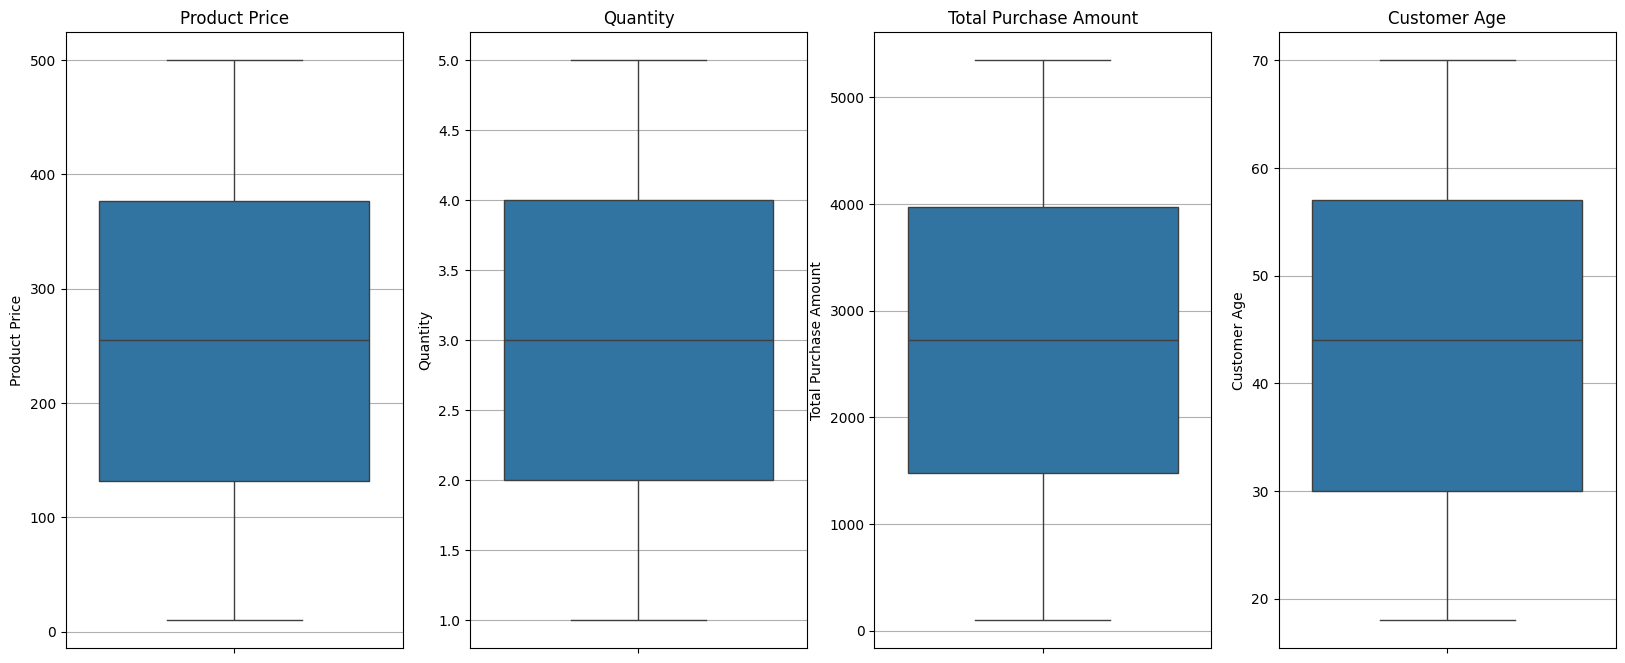

In [31]:
fig, axes = plt.subplots(1, 4, figsize=(20, 8))
axes = axes.ravel()

#  boxlot of the quantitativa vars
for i, col in enumerate(numerical_columns[:4]):
    sns.boxplot(y=data[col], ax=axes[i])  # boxplot
    axes[i].set_title(f'{col}')
    axes[i].set_ylabel(col)
    axes[i].grid(axis='y')

In [45]:
tot=data["Returns"].value_counts().sum()
round(data["Returns"].value_counts()/tot *100, 2)

Returns
1.0    50.08
0.0    49.92
Name: count, dtype: float64

In [46]:
tot=data["Churn"].value_counts().sum()
round(data["Churn"].value_counts()/tot *100, 2)

Churn
0    79.95
1    20.05
Name: count, dtype: float64

*le variabili quantitative non presentano valori outlier e sembrano distribuite in modo regolare, tranne per Churn che risulta schiacchiato su 0 e ha diversi valori outlier su 1*

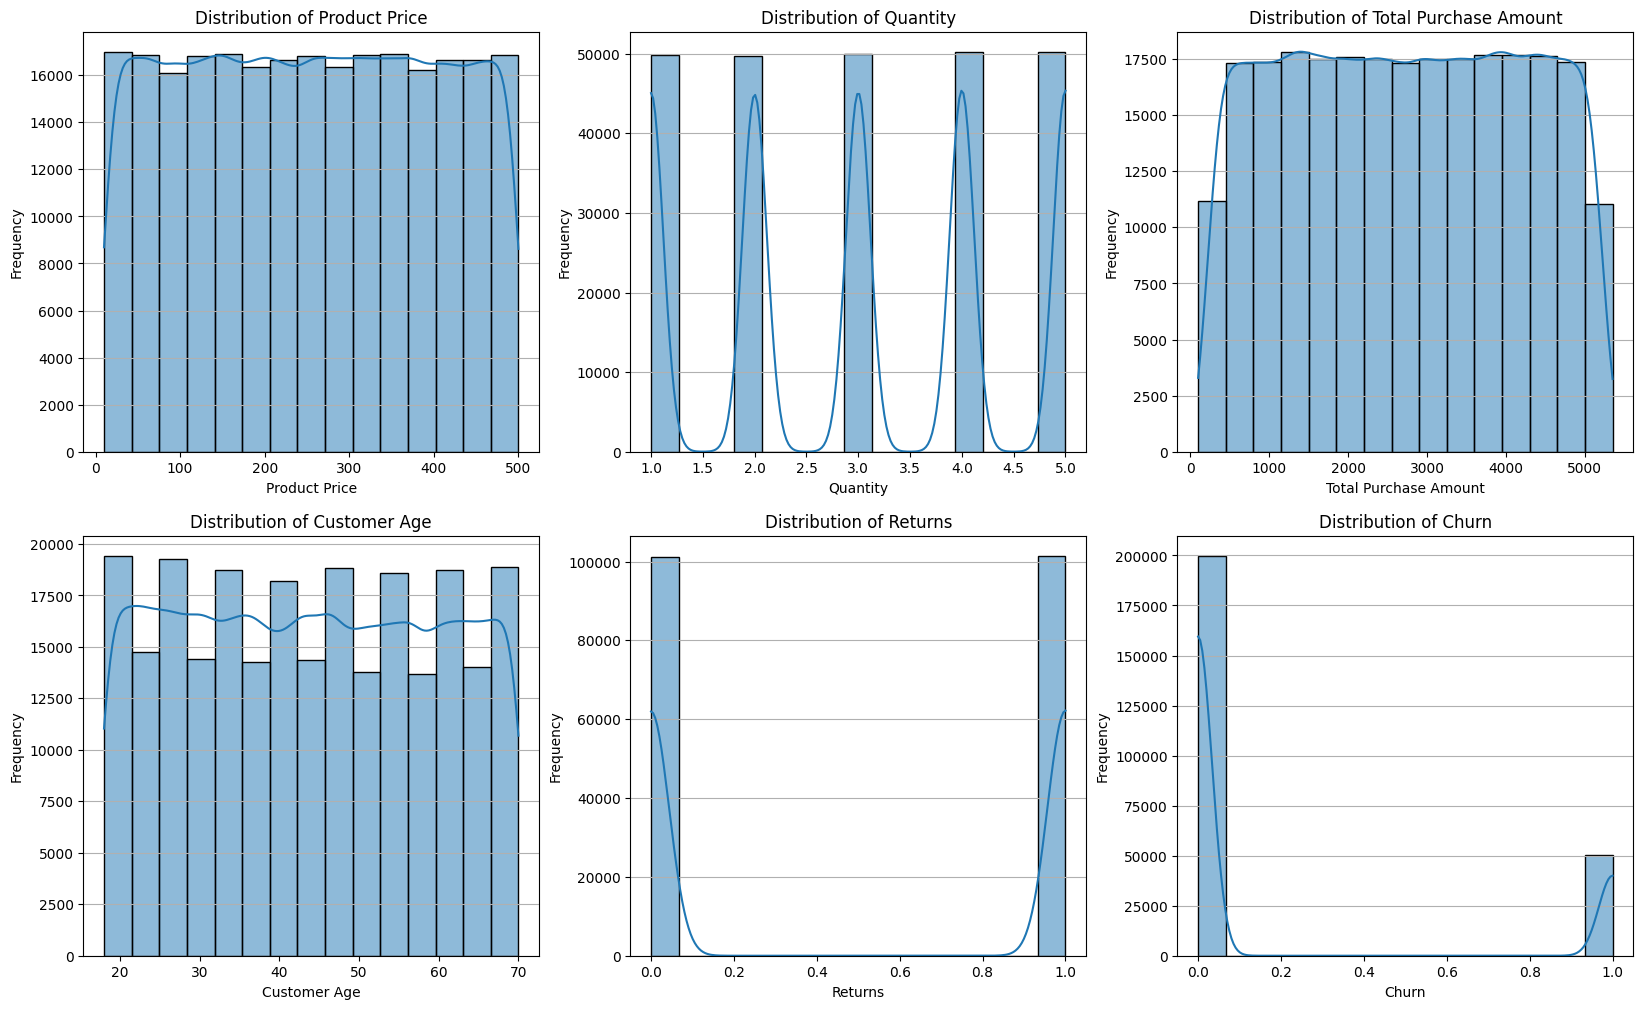

In [32]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

# histogram and distribution
for i, col in enumerate(numerical_columns):
    sns.histplot(data[col], kde=True, bins=15, ax=axes[i])  # density estimation
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y')

*var quantitative appaiono con una distribuzione quasi uniforme*

- categorical vars

In [7]:
categorical_columns = ["Product Category", "Payment Method", "Gender"]

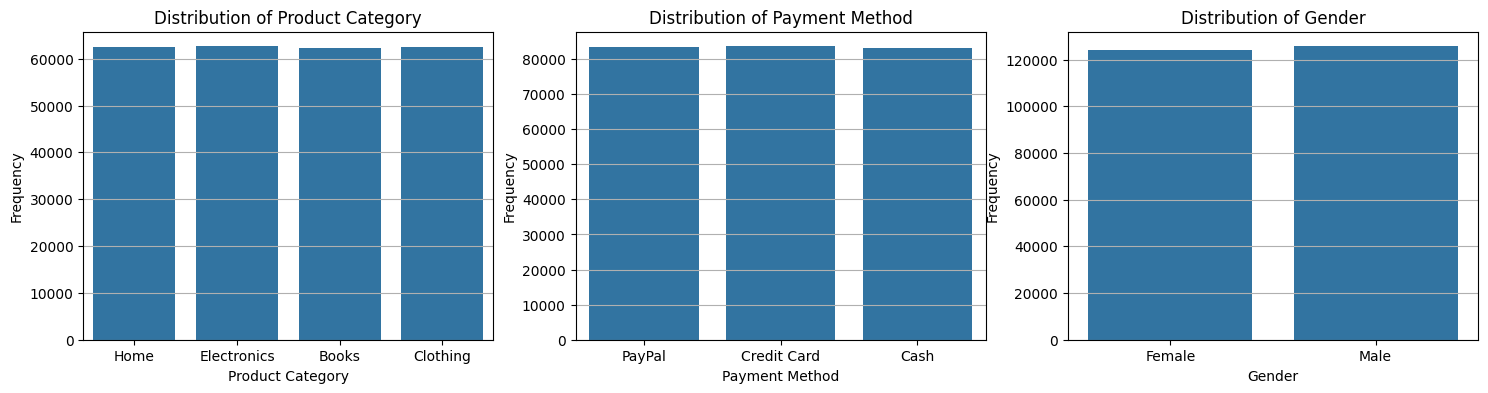

In [172]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
axes = axes.ravel()

# barplot for the categorical vars
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=data, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y')

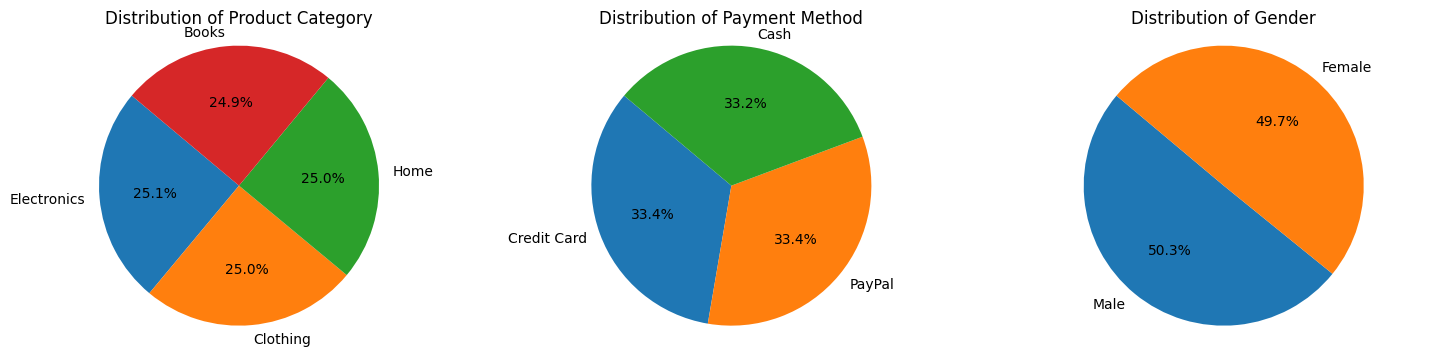

In [173]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
axes = axes.ravel()

# pie chart for the categorical vars
for i, col in enumerate(categorical_columns):
    axes[i].pie(data[col].value_counts(), labels=data[col].value_counts().index,
        autopct='%1.1f%%', startangle=140)
        # add percentages
    axes[i].set_title(f'Distribution of {col}')
    axes[i].axis('equal')  # round plot

*Anche le variabili qualitative risultano equidistribuite*

- time series

*monthly*

In [48]:
data['Year-Month'] = data['Purchase Date'].dt.to_period('M')
monthly_sales = data[data['Year-Month']<'2023-09'].groupby('Year-Month')['Total Purchase Amount'].sum().reset_index()
monthly_sales['Year-Month'] = monthly_sales['Year-Month'].astype(str)

*il mese di settembre 2023 non è concluso, quindi presenta dati su 13 giorni e mostrerebbe valori di Purchase più bassi*

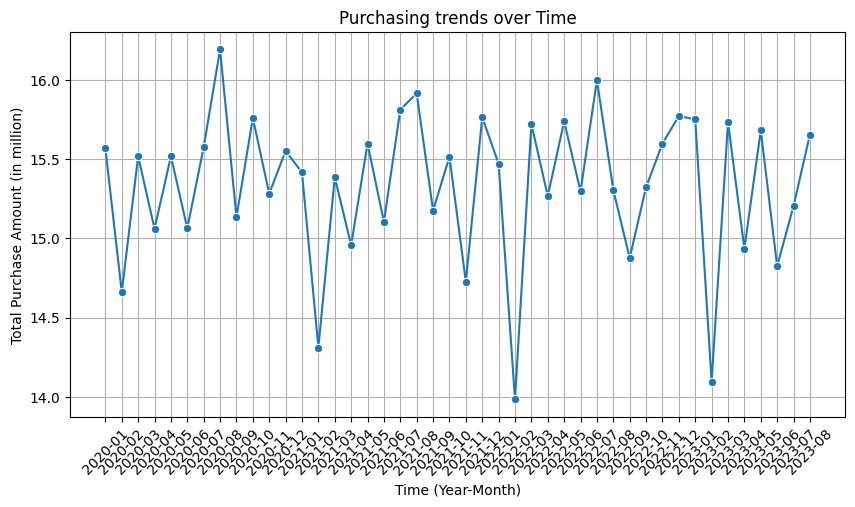

In [52]:
plt.figure(figsize=(10, 5))
ax = sns.lineplot(x=monthly_sales['Year-Month'].astype(str), 
                  y=monthly_sales['Total Purchase Amount']/1000000, 
                  marker='o')
plt.xticks(rotation=45)
plt.xlabel("Time (Year-Month)")
plt.ylabel("Total Purchase Amount (in million)")
plt.title("Purchasing trends over Time")
plt.grid()
plt.show()

*ci sono picchi profondamenti negativi nei mesi di gennaio, e picchi leggermente positivi nei mesi di giugno-luglio*

In [53]:
monthly_sales = data[data['Year-Month']<'2023-09'].groupby(['Year-Month', 'Gender'])['Total Purchase Amount'].sum().reset_index()
monthly_sales['Year-Month'] = monthly_sales['Year-Month'].astype(str)

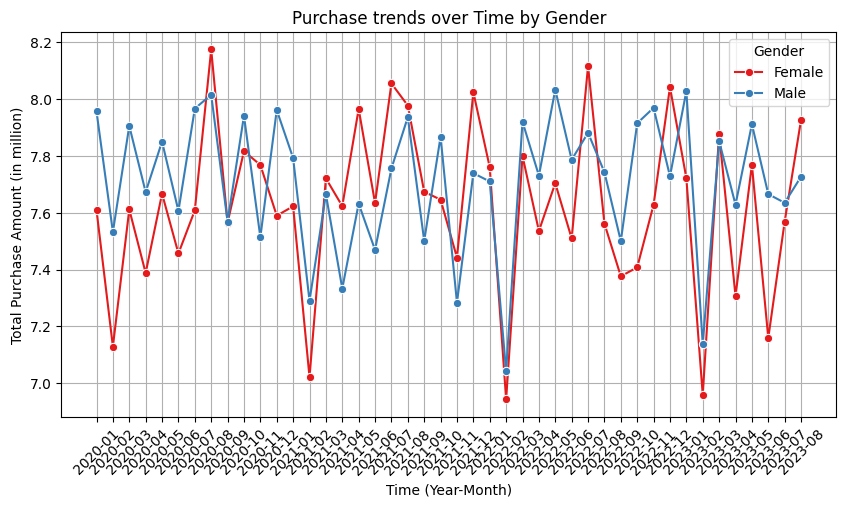

In [82]:
plt.figure(figsize=(10, 5))
ax = sns.lineplot(x=monthly_sales['Year-Month'].astype(str), 
                  y=monthly_sales['Total Purchase Amount']/1000000, 
                  marker='o',
                  hue = monthly_sales['Gender'],
                  palette = 'Set1')
plt.xticks(rotation=45)
plt.xlabel("Time (Year-Month)")
plt.ylabel("Total Purchase Amount (in million)")
plt.title("Purchase trends over Time by Gender")
plt.grid()
plt.show()

*non c'è variabilità consistente neanche tra Gender*

In [177]:
# scalersDict = {}

In [178]:
# featuresList = ["Total Purchase Amount", "Churn"]
# dataOUT = {}
# dataIN = {"Total Purchase Amount": monthly_sales,
          # "Churn": monthly_churn}

In [179]:
# for feature in featuresList:
    # scalersDict[feature] = MinMaxScaler()
    # tempFeatureIn = dataIN[feature][feature].values.reshape(-1, 1)
    # name = feature + " Rescaled"
    # dataOUT[name] = scalersDict[feature].fit_transform(tempFeatureIn).flatten()

In [180]:
# for i, v in enumerate(featuresList):
    # print(i, v)

*weekly*

In [181]:
# data['Year-DayName'] = data['Purchase Date'].dt.strftime('%Y-%A')

In [55]:
data["Year-DayNumber"] = data['Purchase Date'].dt.year.astype(str) + "-" + (data['Purchase Date'].dt.dayofweek+1).astype(str)
# 0: Monday --> +1: Monday=1, Sunday=7
weekly_sales = data.groupby('Year-DayNumber')['Total Purchase Amount'].sum().reset_index()
weekly_sales = weekly_sales.sort_values(by='Year-DayNumber')

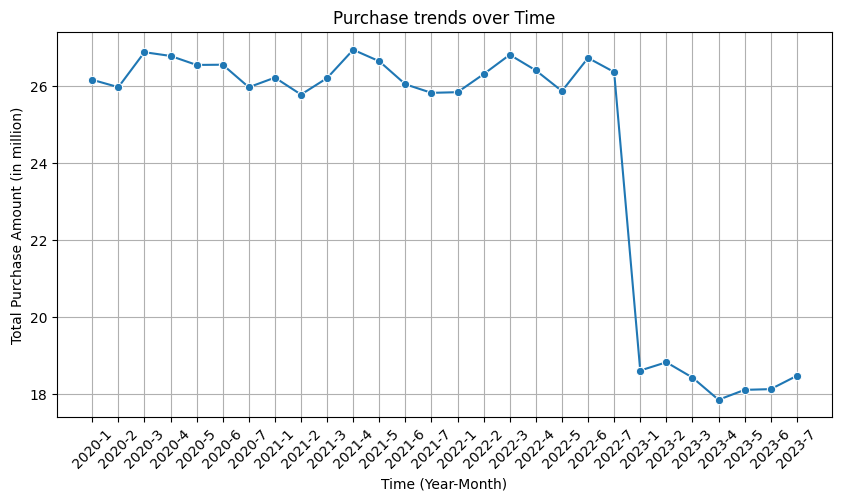

In [56]:
plt.figure(figsize=(10, 5))
ax = sns.lineplot(x=weekly_sales['Year-DayNumber'].astype(str), 
                  y=weekly_sales['Total Purchase Amount']/1000000, 
                  marker='o')
plt.xticks(rotation=45)
plt.xlabel("Time (Year-Month)")
plt.ylabel("Total Purchase Amount (in million)")
plt.title("Purchase trends over Time")
plt.grid()
plt.show()

*problema con questo grafico: l'anno 2023 non si conclude quindi i giorni della settimana mostrano valori molto bassi di Purchase solo perchè hanno meno dati*

*descriptive*

In [69]:
hoursCount = data["Purchase Date"].apply({lambda x: x.hour})
hoursCount = hoursCount.value_counts().reset_index()
hoursCount.columns = ['Hours', 'Count']

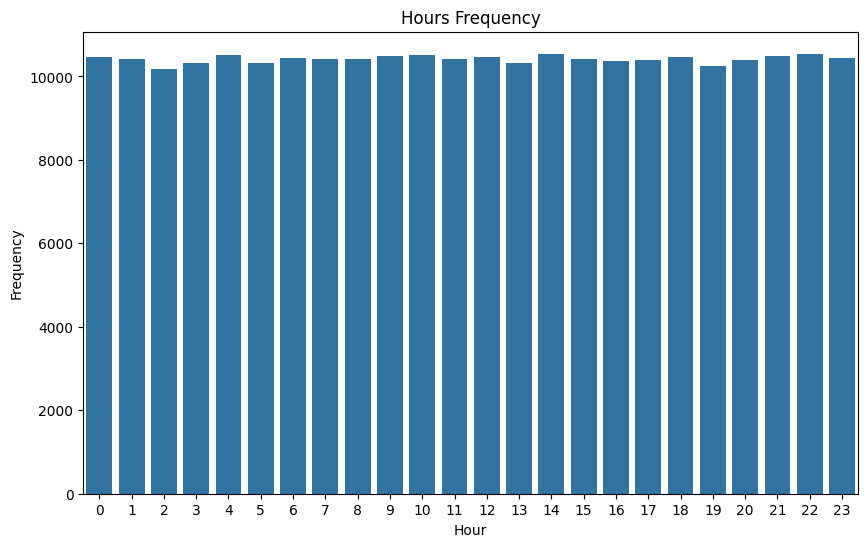

In [185]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Hours',  y='Count', data=hoursCount)
plt.title('Hours Frequency')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.show()

In [70]:
data["Purchase Hour"] = data["Purchase Date"].apply({lambda x: x.hour})
tempVar = pd.DataFrame()
tempVar["Purchase"] = data.groupby("Purchase Hour")["Total Purchase Amount"].sum()/1000000
tempVar["Hours"] = tempVar.index

hoursCount = pd.merge(hoursCount, tempVar[['Hours', 'Purchase']], on='Hours', how='left')

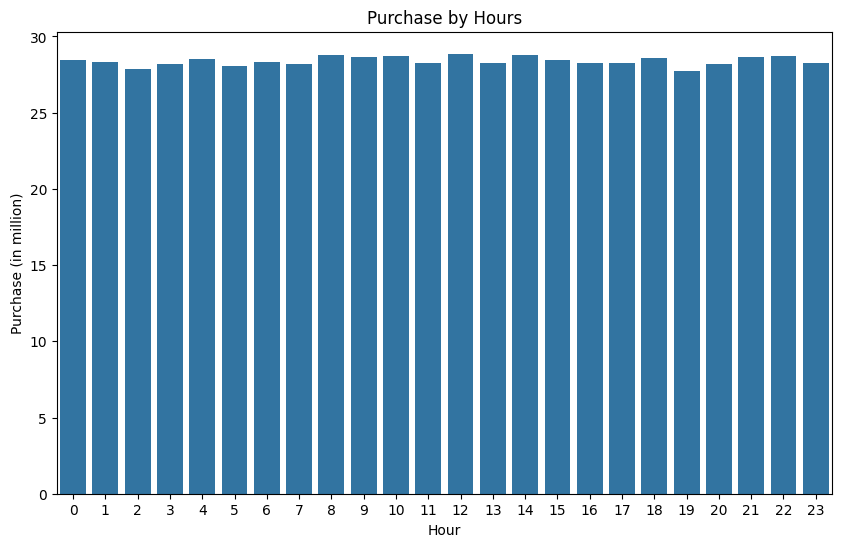

In [71]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Hours', y='Purchase', data=hoursCount)
plt.title('Purchase by Hours')
plt.xlabel('Hour')
plt.ylabel('Purchase (in million)')
plt.show()

In [74]:
daysCount = data["Purchase Date"].dt.dayofweek + 1
daysCount = daysCount.value_counts().reset_index()
daysCount.columns = ['Days', 'Count']

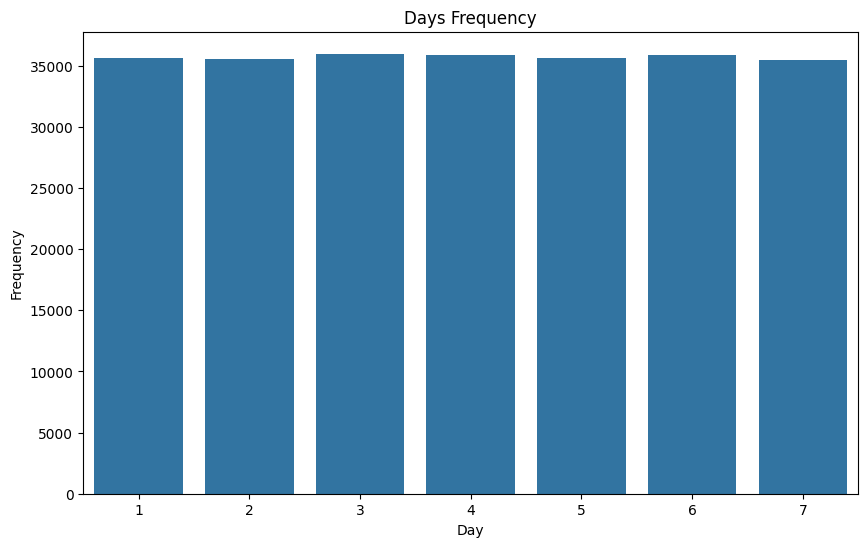

In [189]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Days',  y='Count', data=daysCount)
plt.title('Days Frequency')
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.show()

In [75]:
data["Purchase DayNumber"] = data['Purchase Date'].dt.dayofweek + 1
tempVar = pd.DataFrame()
tempVar["Purchase"] = data.groupby(["Purchase DayNumber", "Gender"])["Total Purchase Amount"].sum()/1000000
tempVar.reset_index(inplace=True)

daysCount = pd.merge(daysCount, tempVar[['Purchase', 'Gender', "Purchase DayNumber"]], left_on='Days', right_on="Purchase DayNumber", how='left')

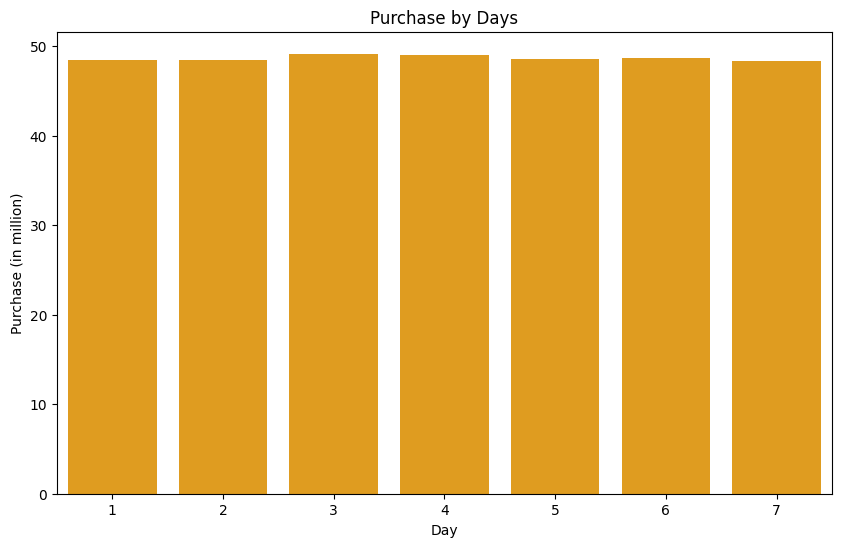

In [76]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Days', y='Purchase', data=daysCount, color='Orange', errorbar=None)
plt.title('Purchase by Days')
plt.xlabel('Day')
plt.ylabel('Purchase (in million)')
plt.show()

*la distribuzione delle ore e dei giorni di acquisto, così come la mole di Purchase nelle differenti ore e giorni sono tutte equidistribuite*

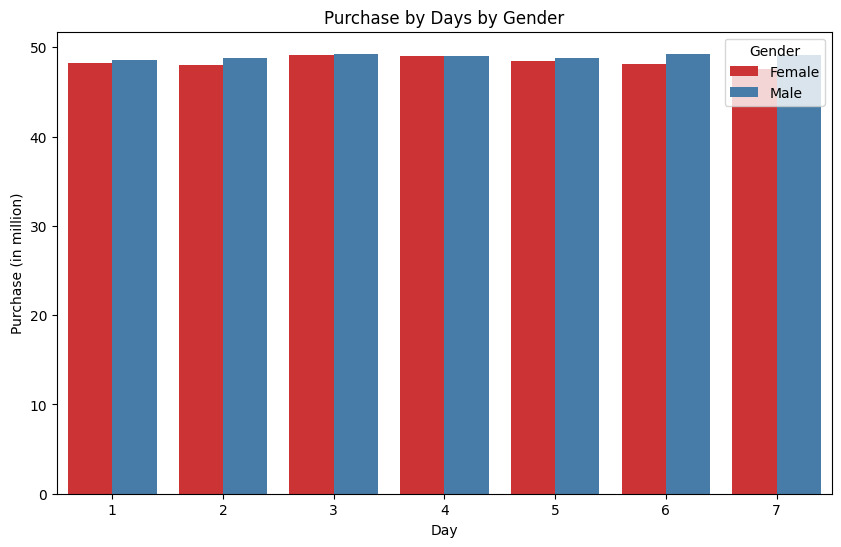

In [78]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Days',  y='Purchase', data=daysCount,
            hue='Gender', palette='Set1')
plt.title('Purchase by Days by Gender')
plt.xlabel('Day')
plt.ylabel('Purchase (in million)')
plt.show()

*non c'è variabilità consistente neanche tra Gender*

***le variabilli sembrano non presentare grandi pattern e appaiono molto piatte***

# NaN

In [34]:
data[data["Returns"]==1].head(5)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Gender,Churn,Date of Purchasing,Hour of Purchasing,Year-Month,Year-DayNumber,Purchase Hour,Purchase DayNumber
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,Female,0,2023-05-03,1900-01-01 21:30:02,2023-05,2023-3,21,3
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,Female,0,2021-05-16,1900-01-01 13:57:44,2021-05,2021-7,13,7
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,Female,0,2020-07-13,1900-01-01 06:16:57,2020-07,2020-1,6,1
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,Female,0,2021-05-01,1900-01-01 11:29:27,2021-05,2021-6,11,6
5,13738,2022-08-25 06:48:33,Home,191,3,3722,Credit Card,27,1.0,Lauren Johnson,Female,0,2022-08-25,1900-01-01 06:48:33,2022-08,2022-4,6,4


In [79]:
NaN_data = data.loc[data['Returns'].isnull()]

In [36]:
NaN_data.shape[0]/data.shape[0]*100

18.9528

*quasi 50k righe presentano valori NaN in Return, circa il 20% del dataset*

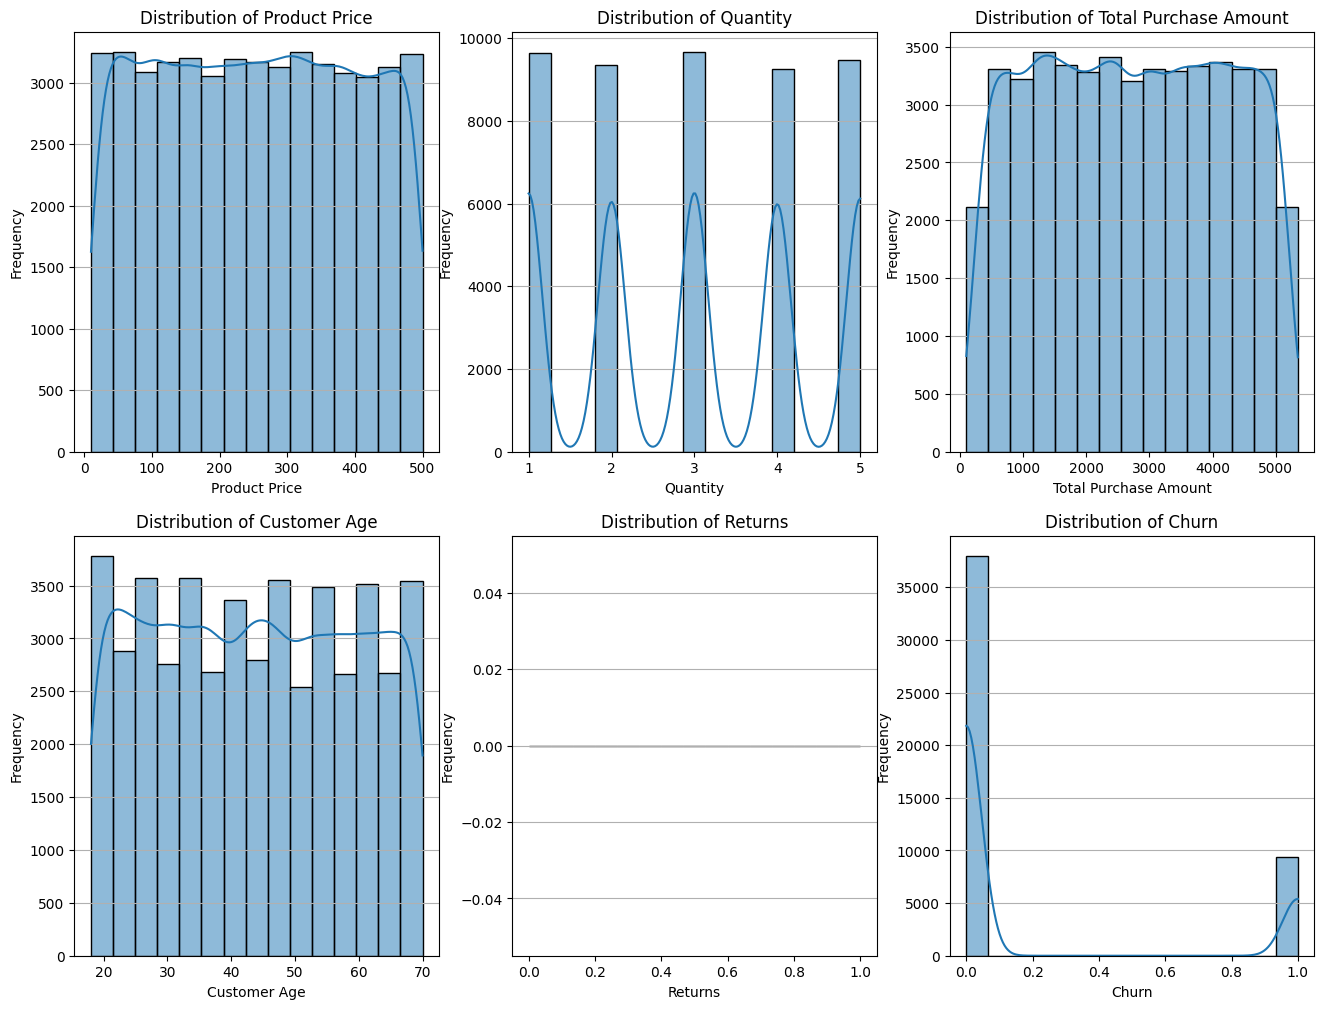

In [37]:
fig, axes = plt.subplots(2, 3, figsize=(16, 12))
axes = axes.ravel()

# histogram and distribution
for i, col in enumerate(numerical_columns):
    sns.histplot(NaN_data[col], kde=True, bins=15, ax=axes[i])  # density estimation
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y')

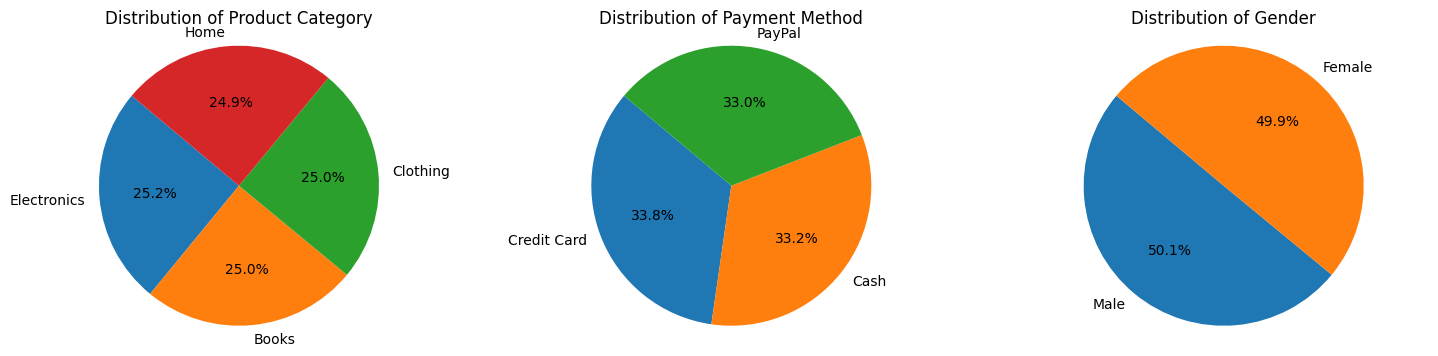

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
axes = axes.ravel()

# pie chart for the categorical vars
for i, col in enumerate(categorical_columns):
    axes[i].pie(NaN_data[col].value_counts(), labels=NaN_data[col].value_counts().index,
        autopct='%1.1f%%', startangle=140)
        # add percentages
    axes[i].set_title(f'Distribution of {col}')
    axes[i].axis('equal')  # round plot

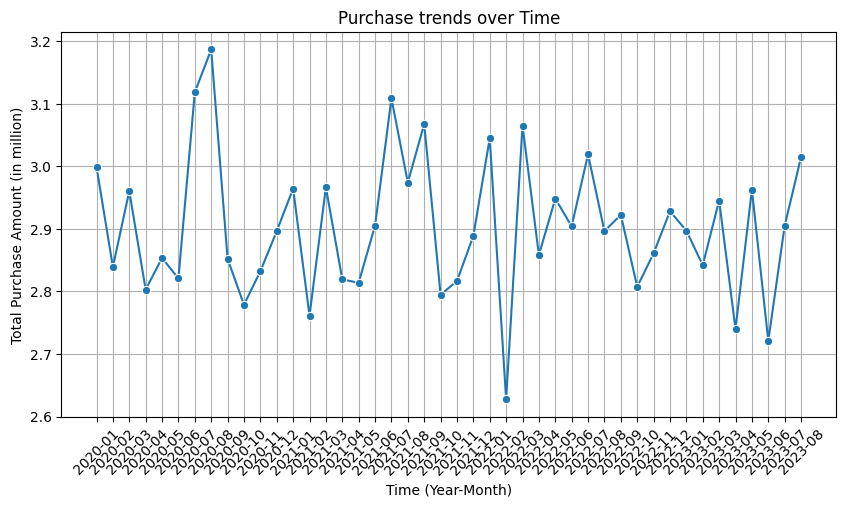

In [80]:
monthly_purchase_NaN = NaN_data[NaN_data['Year-Month']<'2023-09'].groupby('Year-Month')['Total Purchase Amount'].sum().reset_index()
monthly_purchase_NaN['Year-Month'] = monthly_purchase_NaN['Year-Month'].astype(str)
plt.figure(figsize=(10, 5))
ax = sns.lineplot(x=monthly_purchase_NaN['Year-Month'].astype(str), 
                  y=monthly_purchase_NaN['Total Purchase Amount']/1000000, 
                  marker='o')
plt.xticks(rotation=45)
plt.xlabel("Time (Year-Month)")
plt.ylabel("Total Purchase Amount (in million)")
plt.title("Purchase trends over Time")
plt.grid()
plt.show()

*il dataset formato con solo le righe che presentano valori NaN mostra distribuzioni simili alle righe non valori in Return. Ciò significa che non c'è grande bisogno di studiare NaN come un valore a sè stante rispetto  a 0 e 1. Inotre che si possono intraprendere due strade: eliminare le righe NaN o imputarle casualemente (50-50) come 0 o 1*

In [18]:
data.groupby("Customer ID")["Returns"].apply('unique')

Customer ID
1             [0.0, nan]
2             [0.0, 1.0]
3             [nan, 0.0]
4             [1.0, 0.0]
5             [nan, 1.0]
              ...       
49996    [nan, 0.0, 1.0]
49997              [0.0]
49998         [0.0, 1.0]
49999    [nan, 0.0, 1.0]
50000    [1.0, 0.0, nan]
Name: Returns, Length: 49661, dtype: object

*non ci sono pattern neanche raggruppando per ID cliente: ci sono clienti con 1, 0 e NaN, altri con 0 e NaN, e altri ancora con 1 e NaN*

*prendere il valore più frequente e poi nel caso fare imputazione casuale*

# Correlation

- quantitative var & churn

In [28]:
correlation_matrix = data[numerical_columns].corr()
correlation_matrix.round(2)

,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Churn
Product Price,1.0,0.0,-0.00,0.00,0.0,0.0
Quantity,0.0,1.0,0.00,-0.00,0.0,-0.0
Total Purchase Amount,-0.0,0.0,1.00,0.06,0.0,0.0
Customer Age,0.0,-0.0,0.06,1.00,-0.0,-0.0
Returns,0.0,0.0,0.00,-0.00,1.0,-0.0
Churn,0.0,-0.0,0.00,-0.00,-0.0,1.0


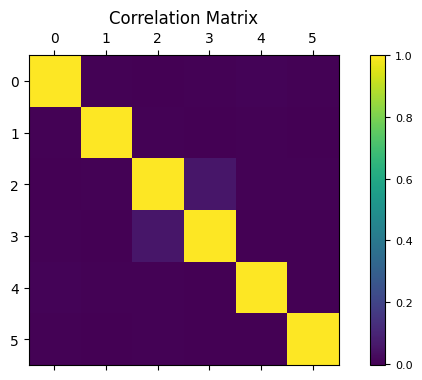

In [29]:
f = plt.figure(figsize=(8, 4))
plt.matshow(correlation_matrix, fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=8)
plt.title('Correlation Matrix', fontsize=12);

In [30]:
corr = correlation_matrix
corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Churn
Product Price,1.00,0.00,-0.00,0.00,0.00,0.00
Quantity,0.00,1.00,0.00,-0.00,0.00,-0.00
Total Purchase Amount,-0.00,0.00,1.00,0.06,0.00,0.00
Customer Age,0.00,-0.00,0.06,1.00,-0.00,-0.00
Returns,0.00,0.00,0.00,-0.00,1.00,-0.00
Churn,0.00,-0.00,0.00,-0.00,-0.00,1.00


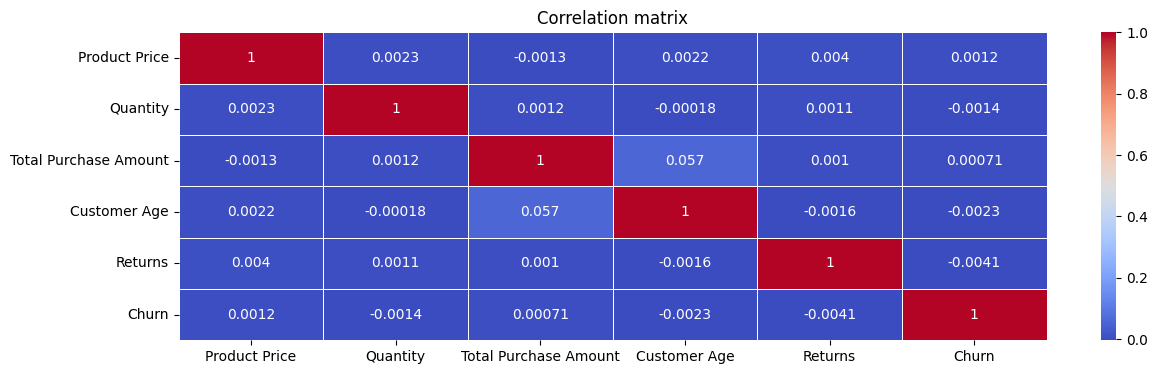

In [225]:
plt.figure(figsize=(14, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation matrix')
plt.xticks(rotation=0)
plt.show()

*diversi grafici, no correlazione tra nessuna variabile*

- plot churn vs quantitative vars

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

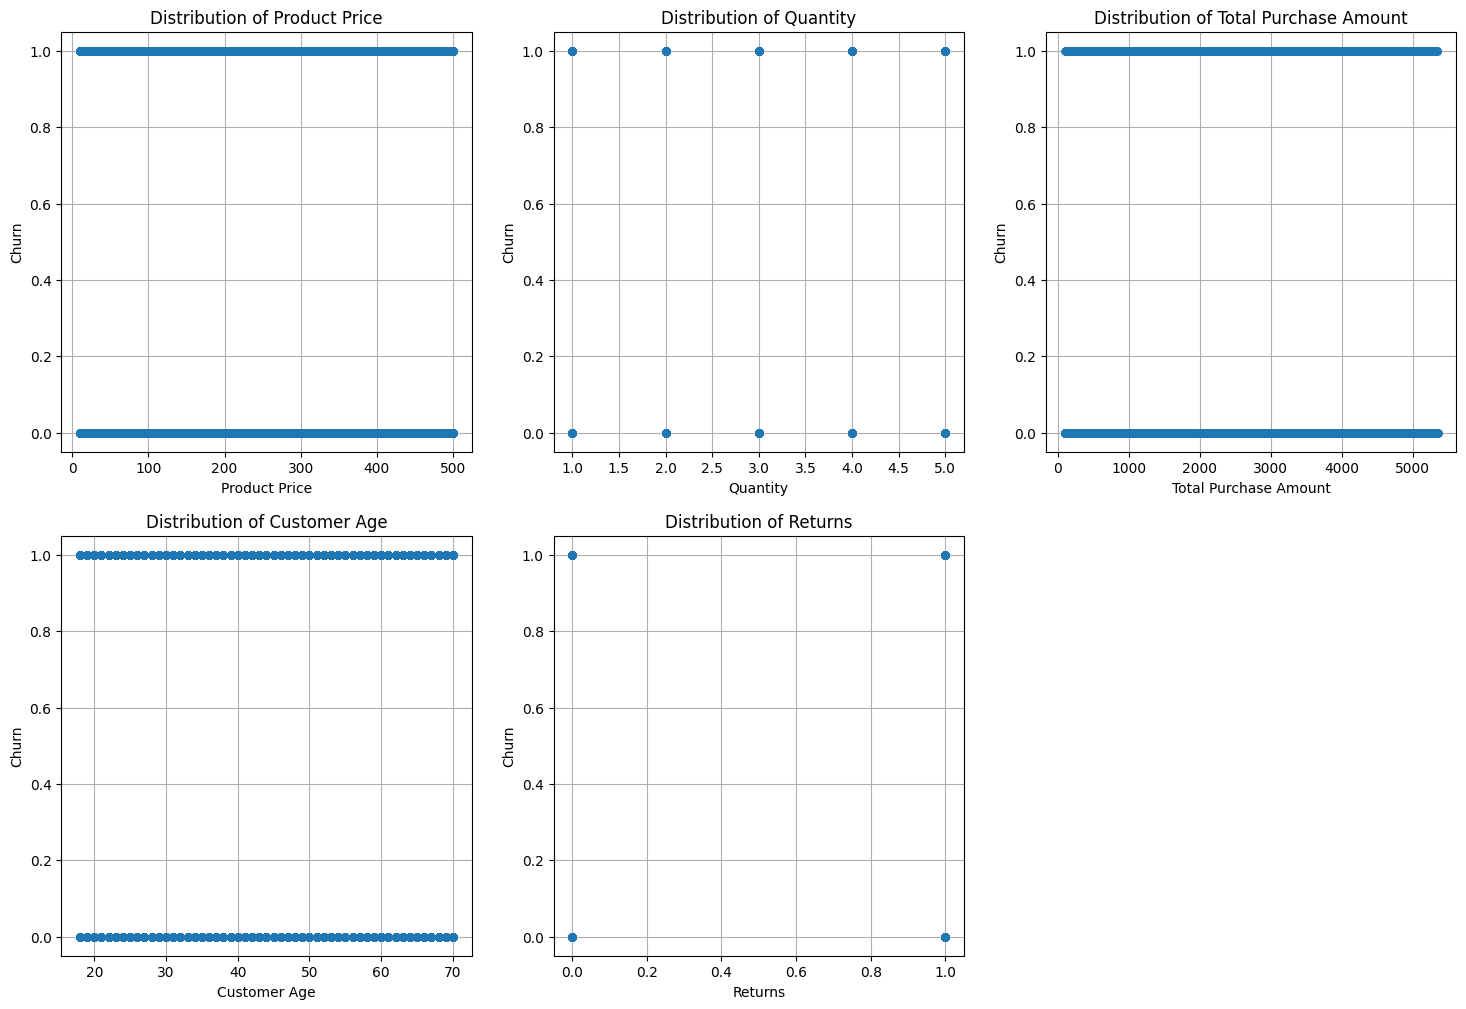

In [32]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

# pie chart for the categorical vars
for i, col in enumerate(numerical_columns[:5]):
    axes[i].plot(data[col], data["Churn"], 'o', markersize=5)
    axes[i].set_title(f'Polt of Churn vs {col}')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Churn')
    axes[i].grid(True)

axes[-1].axis('off')

*Churn non sembra presentare valori diversi a seconda della distribuzione delle altre variabili*

- group by quantitative vars

In [33]:
(data.groupby("Product Category")["Payment Method"]).value_counts().unstack()

Payment Method,Cash,Credit Card,PayPal
Product Category,,,
Books,20794,20771,20682
Clothing,20633,20992,20956
Electronics,20727,20981,20922
Home,20858,20803,20881


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Books'),
  Text(1, 0, 'Clothing'),
  Text(2, 0, 'Electronics'),
  Text(3, 0, 'Home')])

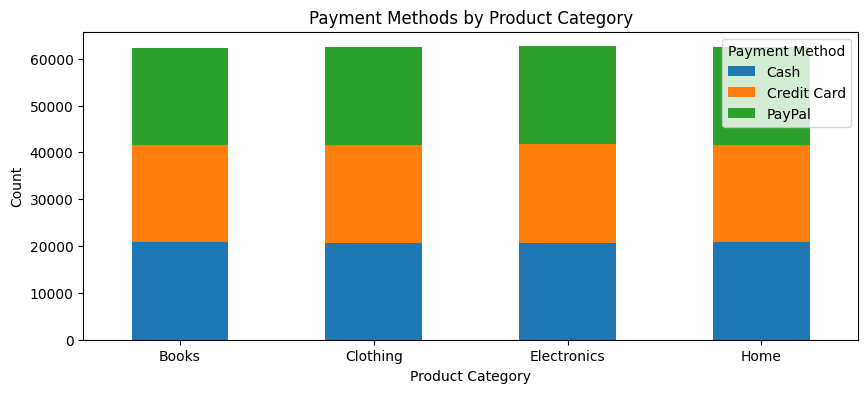

In [230]:
group = (data.groupby("Product Category")["Payment Method"]).value_counts().unstack()
group.plot(kind='bar', stacked=True, figsize=(10,4))
plt.title('Payment Methods by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.legend(title='Payment Method')
plt.xticks(rotation=0)

In [35]:
data.groupby("Product Category").agg({"Payment Method": "value_counts"})

Payment Method
Product Category Payment Method                
Books            Cash                     20794
                 Credit Card              20771
                 PayPal                   20682
Clothing         Credit Card              20992
                 PayPal                   20956
                 Cash                     20633
Electronics      Credit Card              20981
                 PayPal                   20922
                 Cash                     20727
Home             PayPal                   20881
                 Cash                     20858
                 Credit Card              20803

In [36]:
data.groupby("Product Category").agg({"Gender": "value_counts"})

Gender
Product Category Gender        
Books            Male     31383
                 Female   30864
Clothing         Male     31522
                 Female   31059
Electronics      Male     31334
                 Female   31296
Home             Male     31437
                 Female   31105

In [37]:
data.groupby("Payment Method").agg({"Gender": "value_counts"})

Gender
Payment Method Gender        
Cash           Male     41704
               Female   41308
Credit Card    Male     41938
               Female   41609
PayPal         Male     42034
               Female   41407

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

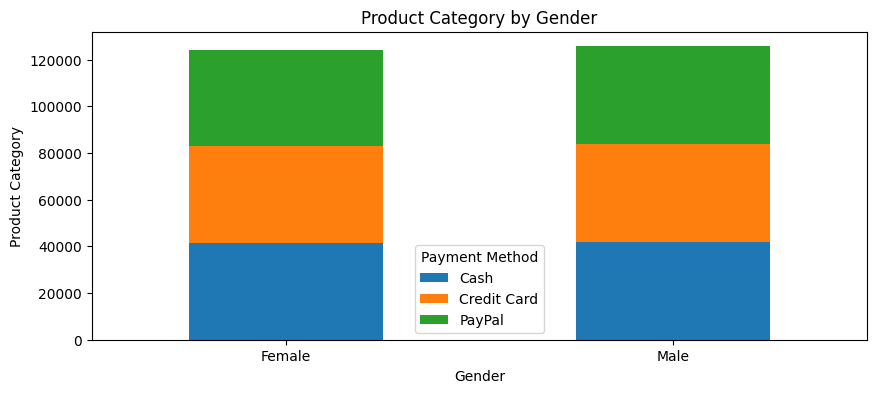

In [232]:
group = (data.groupby("Gender")["Payment Method"]).value_counts().unstack()
group.plot(kind='bar', stacked=True, figsize=(10,4))
plt.title('Product Category by Gender')
plt.xlabel('Gender')
plt.ylabel('Product Category')
plt.legend(title='Payment Method')
plt.xticks(rotation=0)

*non sembra essereci correlazione naenche tra le varibili qualitative*

In [ ]:
# grouped_data = data.groupby(['Year-Month', 'Gender']).agg({
    # 'Returns': 'sum',  # Esempio di aggregazione sulla colonna "Returns"
    # 'Sales': 'mean'    # Esempio di aggregazione sulla colonna "Sales"
# }).reset_index()